In [ ]:
import jax.numpy as jnp
import jax
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from glue_analysis import glue_solver

In [ ]:
def generate_gmm_data(key, means, sigma, points_per_centroid):
    """
    Generates synthetic classification data based on Gaussian clusters.
    
    Args:
        key: jax.random.PRNGKey
        means: Array of shape (P, mu_count, N) defining centroid locations.
        sigma: Float representing standard deviation (uniform scalar).
        points_per_centroid: Int, number of points to generate per centroid.
        
    Returns:
        points: Array of shape (P, total_points_per_class, N)
    """
    # 1. Extract dimensions from the means array
    P, mu_count, N = means.shape
    # 2. Generate Noise
    noise_shape = (P, mu_count, points_per_centroid, N)
    epsilon = jax.random.normal(key, shape=noise_shape)
    # 3. Broadcast Means
    means_expanded = means[:, :, jnp.newaxis, :]
    # 4. Apply Gaussian transformation: X = mu + sigma * noise
    raw_points = means_expanded + (sigma * epsilon)
    # 5. Reshape to required output
    points = raw_points.reshape(P, -1, N)
    return points

In [ ]:
def plot_data(data):
    """
    Plots generated GMM data in 2D or 3D based on the feature dimension N.
    
    Args:
        data: JAX array of shape (P, n_total_points, N)
        means: Optional JAX array of shape (P, mu_count, N) for plotting centroids
    """
    P, n_points, N = data.shape
    colors = [
        '#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', 
        '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52'
    ]
    # --- Setup Figure ---
    fig = plt.figure(figsize=(6, 4))
    # --- Check Dimensionality ---
    if N == 2:
        ax = fig.add_subplot(111)
        ax.set_title(f"2D Data Visualization\nShape: {data.shape}")
    elif N == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.set_title(f"3D Data Visualization\nShape: {data.shape}")
    else:
        raise ValueError(f"Plotting only supported for N=2 or N=3, but got N={N}")

    # --- Plotting Loop ---
    for i in range(P):
        c = colors[i % len(colors)]
        class_points = data[i]
        
        # 2D Plotting
        if N == 2:
            ax.scatter(class_points[:, 0], 
                       class_points[:, 1], 
                       label=f"Class {i}", 
                       c=c)
                
        # 3D Plotting
        elif N == 3:
            ax.scatter(class_points[:, 0], 
                       class_points[:, 1], 
                       class_points[:, 2], 
                       label=f"Class {i}", 
                       c=c)

    # --- Labels and Grid ---
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    if N == 3:
        ax.set_zlabel("Feature 3")
        
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.show()

### Well Separated Two Classes

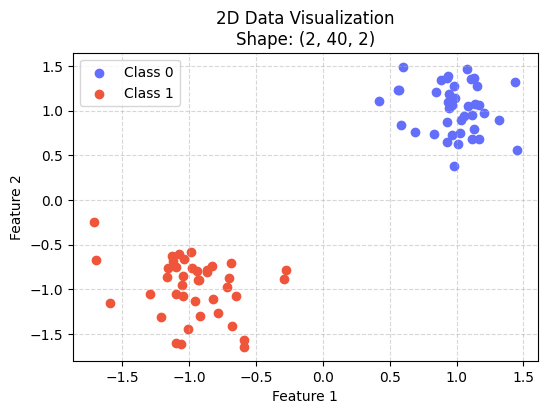

In [ ]:
P = 2
n_points_per_cloud = 40
M = 10
N = 2
n_t = 40
sigma = 0.3
mus = jnp.array([[[1.0, 1.0]],[[-1.0, -1.0]]])
seed = 42
key = jax.random.PRNGKey(seed)

# Generate the data
data = generate_gmm_data(key, mus, sigma, n_points_per_cloud)

plot_data(data)

In [ ]:
# Use glue solver and plot results:
gl_key = jax.random.split(key)
gl_solver = glue_solver(key, P, M, N, n_t)
geometries = gl_solver.run(data) # 14 s after jitted sample_anchor_points

In [ ]:
# show the plots
figs = gl_solver.make_plots()

In [ ]:
for f in figs:
    f.show()

# Poorly separated two classes

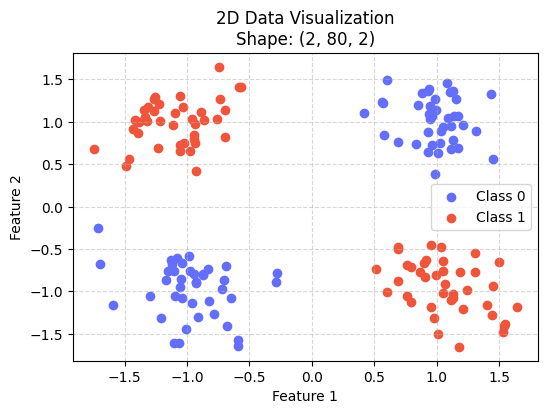

In [ ]:
P = 2
n_points_per_cloud = 40
M = 3 
N = 2
n_t = 40
sigma = 0.3
mus = jnp.array([[[1.0, 1.0],[-1.0, -1.0]],
                 [[-1.0, 1.0], [1.0, -1.0]]])
seed = 42
key = jax.random.PRNGKey(seed)

# Generate the data
data = generate_gmm_data(key, mus, sigma, n_points_per_cloud)

plot_data(data)

### Many Classes, one center

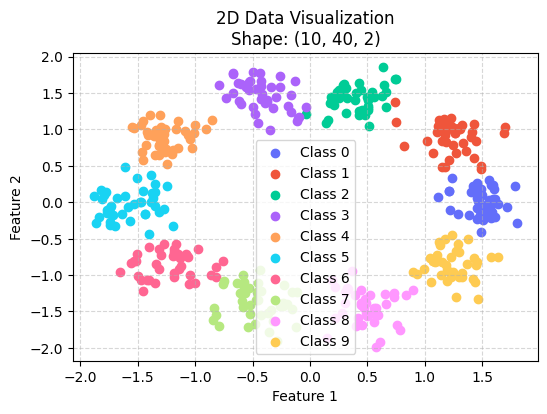

In [ ]:
P = 10
n_points_per_cloud = 40
M = 3 
N = 2
n_t = 40
sigma = 0.2
r = 1.5
mus = jnp.array([[[r*jnp.cos(2*jnp.pi*pix/P), r*jnp.sin(2*jnp.pi*pix/P)]] for pix in range(P)])
seed = 42
key = jax.random.PRNGKey(seed)

# Generate the data
data = generate_gmm_data(key, mus, sigma, n_points_per_cloud)

plot_data(data)

### 3D data

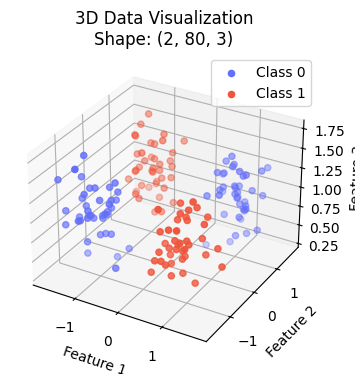

In [ ]:
P = 2
n_points_per_cloud = 40
M = 3 
N = 3
n_t = 40
sigma = 0.3
mus = jnp.array([[[1.0, 1.0, 1.0],[-1.0, -1.0, 1.0]],
                 [[-1.0, 1.0, 1.0], [1.0, -1.0, 1.0]]])
seed = 42
key = jax.random.PRNGKey(seed)

# Generate the data
data = generate_gmm_data(key, mus, sigma, n_points_per_cloud)

plot_data(data)